In [1]:
import torch
import torch_geometric
import networkx as nx
from torch_geometric.utils.convert import from_networkx
from torch_geometric.data import Batch

# Batching

In [2]:
graph_list = [torch_geometric.utils.from_networkx(nx.generators.grid_2d_graph(i, i)) for i in range(2, 5)]

In [3]:
graph_batch = torch_geometric.data.Batch.from_data_list(graph_list)

In [4]:
graph_batch.ptr

tensor([ 0,  4, 13, 29])

# edge index to adj

In [5]:
def edge_index_to_adj(edge_index: torch.Tensor, num_nodes: int):
    adj = torch.zeros((num_nodes, num_nodes))
    adj[edge_index[0, :], edge_index[1, :]] = 1
    return adj

In [6]:
G = nx.generators.grid_graph(dim=(4,))

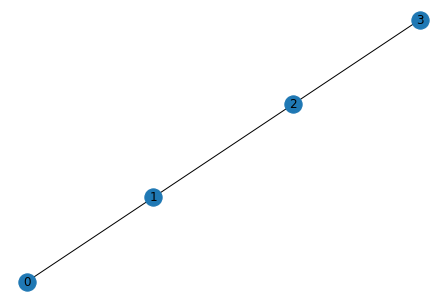

In [7]:
nx.draw(G, with_labels=True)

In [8]:
data = from_networkx(G)

In [9]:
data.edge_index.shape

torch.Size([2, 6])

In [10]:
edge_index_to_adj(data.edge_index, data.num_nodes)

tensor([[0., 1., 0., 0.],
        [1., 0., 1., 0.],
        [0., 1., 0., 1.],
        [0., 0., 1., 0.]])

# Mask for block adjacency matrix

In [11]:
data_list = [data, data]
# length_batches = x.ptr[1:] - x.ptr[:-1]
# mask = torch.block_diag(*[torch.ones(i, i) for i in length_batches])
batch = Batch.from_data_list(data_list)

In [12]:
length_batches = batch.ptr[1:] - batch.ptr[:-1]
mask = torch.block_diag(*[torch.ones(i, i) for i in length_batches]).type(torch.bool)
opposite_mask = ~mask

In [13]:
mat = torch.randint(0, 10, (*mask.shape, 2))

In [14]:
mat[opposite_mask] = torch.tensor([0, 0])

In [15]:
mat.shape

torch.Size([8, 8, 2])

In [16]:
mat.flatten(0, 1).shape

torch.Size([64, 2])